<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Collecting Job Data Using APIs**


Estimated time needed: **45 to 60** minutes


## Objectives


After completing this lab, you will be able to:


*   Collect job data from GitHub Jobs API
*   Store the collected data into an excel spreadsheet.


## Warm-Up Exercise


Before you attempt the actual lab, here is a fully solved warmup exercise that will help you to learn how to access an API.


Using an API, let us find out who currently are on the International Space Station (ISS).<br> The API at [http://api.open-notify.org/astros.json](http://api.open-notify.org/astros.json?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) gives us the information of astronauts currently on ISS in json format.<br>
You can read more about this API at [http://open-notify.org/Open-Notify-API/People-In-Space/](http://open-notify.org/Open-Notify-API/People-In-Space?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)


In [1]:
import requests # you need this module to make an API call

In [2]:
api_url = "http://api.open-notify.org/astros.json" # this url gives use the astronaut data

In [3]:
response = requests.get(api_url) # Call the API using the get method and store the
                                # output of the API call in a variable called response.

In [4]:
if response.ok:             # if all is well() no errors, no network timeouts)
    data = response.json()  # store the result in json format in a variable called data
                            # the variable data is of type dictionary.

In [5]:
print(data)   # print the data just to check the output or for debugging

{'message': 'success', 'people': [{'craft': 'ISS', 'name': 'Mark Vande Hei'}, {'craft': 'ISS', 'name': 'Pyotr Dubrov'}, {'craft': 'ISS', 'name': 'Anton Shkaplerov'}, {'craft': 'Shenzhou 13', 'name': 'Zhai Zhigang'}, {'craft': 'Shenzhou 13', 'name': 'Wang Yaping'}, {'craft': 'Shenzhou 13', 'name': 'Ye Guangfu'}, {'craft': 'ISS', 'name': 'Raja Chari'}, {'craft': 'ISS', 'name': 'Tom Marshburn'}, {'craft': 'ISS', 'name': 'Kayla Barron'}, {'craft': 'ISS', 'name': 'Matthias Maurer'}, {'craft': 'ISS', 'name': 'Alexander Misurkin'}, {'craft': 'ISS', 'name': 'Yusaku Maezawa'}, {'craft': 'ISS', 'name': 'Yozo Hirano'}], 'number': 13}


Print the number of astronauts currently on ISS.


In [6]:
print(data.get('number'))

13


Print the names of the astronauts currently on ISS.


In [7]:
astronauts = data.get('people')
print("There are {} astronauts on ISS".format(len(astronauts)))
print("And their names are :")
for astronaut in astronauts:
    print(astronaut.get('name'))

There are 13 astronauts on ISS
And their names are :
Mark Vande Hei
Pyotr Dubrov
Anton Shkaplerov
Zhai Zhigang
Wang Yaping
Ye Guangfu
Raja Chari
Tom Marshburn
Kayla Barron
Matthias Maurer
Alexander Misurkin
Yusaku Maezawa
Yozo Hirano


Hope the warmup was helpful. Good luck with your next lab!


## Lab: Collect Jobs Data using GitHub Jobs API


### Objective: Determine the number of jobs currently open for various technologies


Collect the number of job postings for the following languages using the API:

*   C
*   C#
*   C++
*   Java
*   JavaScript
*   Python
*   Scala
*   Oracle
*   SQL Server
*   MySQL Server
*   PostgreSQL
*   MongoDB


In [8]:
#Import required libraries
import requests
import json
import pandas as pd

In [9]:
baseurl = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/datasets/githubposting.json"
response = requests.get(baseurl)  
if response.ok:             
    data = response.json()    
data = pd.DataFrame(data)
print(data.to_string())

       technology number of job posting
0            java                     1
1               C                    10
2              C#                     1
3             C++                     1
4            Java                     2
5      JavaScript                     4
6          Python                     1
7           Scala                     5
8          Oracle                     0
9      SQL Server                     1
10   MySQL Server                     0
11     PostgreSQL                     1
12        MongoDB                     0
13           java                     1
14              C                    20
15             C#                     2
16            C++                     3
17           Java                     2
18     JavaScript                     3
19         Python                     2
20          Scala                     7
21         Oracle                     0
22     SQL Server                     1
23   MySQL Server                     0


Write a function to get the number of jobs for the given technology.


In [10]:
data.rename(columns={"A": "technology", "B": "number of job posting"},inplace=True)
data[(data['technology']!="technology") & (data['number of job posting']!='number of job posting')]
data[[ "number of job posting"]] = data[["number of job posting"]].astype(int) 
def get_number_of_jobs(technology):

    #your code goes here
    number_of_jobs = data.groupby('technology').sum().loc[technology,:][0]
         
    return technology,number_of_jobs
print(get_number_of_jobs('Python'))

('Python', 51)


Call the function for Python and check if it is working.


In [12]:
print(get_number_of_jobs('Python'))

('Python', 51)


### Store the results in an excel file


Call the API for all the given technologies above and write the results in an excel spreadsheet.


If you do not know how create excel file using python, double click here for **hints**.

<!--

from openpyxl import Workbook        # import Workbook class from module openpyxl
wb=Workbook()                        # create a workbook object
ws=wb.active                         # use the active worksheet
ws.append(['Country','Continent'])   # add a row with two columns 'Country' and 'Continent'
ws.append(['Eygpt','Africa'])        # add a row with two columns 'Egypt' and 'Africa'
ws.append(['India','Asia'])          # add another row
ws.append(['France','Europe'])       # add another row
wb.save("countries.xlsx")            # save the workbook into a file called countries.xlsx


-->


Create a python list of all technologies for which you need to find the number of jobs postings.


In [13]:
#your code goes here
technology =('C','C#','C++','Java','JavaScript','Python','Scala','Oracle','SQL Server','MySQL Server','PostgreSQL','MongoDB')
technology 

('C',
 'C#',
 'C++',
 'Java',
 'JavaScript',
 'Python',
 'Scala',
 'Oracle',
 'SQL Server',
 'MySQL Server',
 'PostgreSQL',
 'MongoDB')

Import libraries required to create excel spreadsheet


In [22]:
# your code goes here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_column',None)
pd.set_option('display.max_row',100)
pd.set_option('display.width',1200)
!pip3 install openpyxl
from openpyxl import Workbook 

Create a workbook and select the active worksheet


In [23]:
# your code goes here
wb=Workbook()                       
ws=wb.active 

Find the number of jobs postings for each of the technology in the above list.
Write the technology name and the number of jobs postings into the excel spreadsheet.


In [25]:
#your code goes here
tech_list = list()
for language in technology:
    jobs = get_number_of_jobs(language)
    tech_list.append(jobs)
    
ws.append(['Language', 'Job Postings'])
[ws.append(i) for i in tech_list]

[None, None, None, None, None, None, None, None, None, None, None, None]

Save into an excel spreadsheet named 'github-job-postings.xlsx'.


In [26]:
#your code goes here
wb.save("github-job-postings.xlsx")

In [27]:
import pandas as pd
import os
print (os.path.abspath("github-job-postings.xlsx"))
filename="path/github-job-postings.xlsx"
df=pd.read_excel("github-job-postings.xlsx")
print(df)

/home/wsuser/work/github-job-postings.xlsx
        Language  Job Postings
0              C           184
1             C#            14
2            C++            24
3           Java            83
4     JavaScript            65
5         Python            51
6          Scala            47
7         Oracle             8
8     SQL Server            16
9   MySQL Server             7
10    PostgreSQL            17
11       MongoDB            18


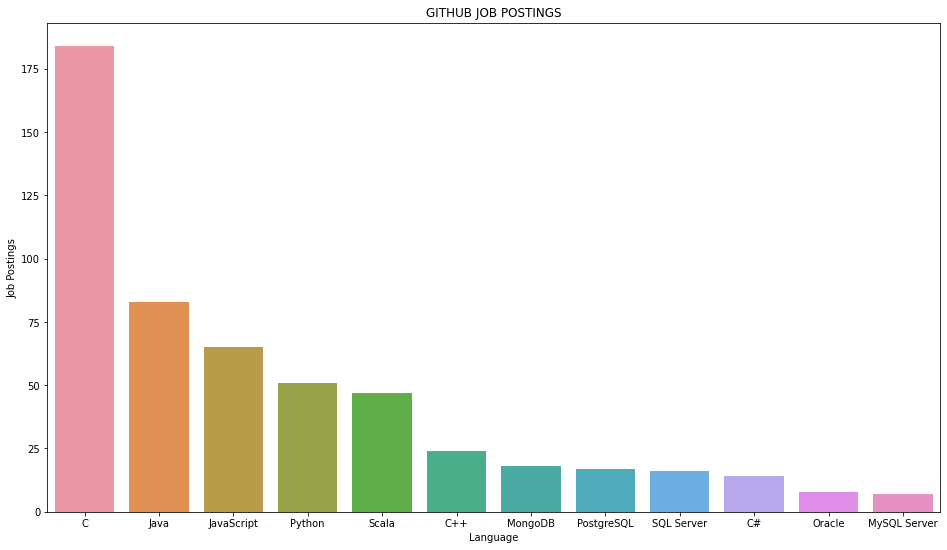

In [33]:
plt.figure(figsize=(16,9))
plt.title("GITHUB JOB POSTINGS")
sns.barplot(data=df.sort_values(by="Job Postings", ascending=False),x="Language",y="Job Postings")
plt.show()


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2021-6-25         | 0.2     | Malika            | Updated GitHub job json link       |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
